In [322]:
pip install ucimlrepo

In [323]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
census_income = fetch_ucirepo(id=20)

# data (as pandas dataframes)
X = census_income.data.features
y = census_income.data.targets

# metadata
print(census_income.metadata)

# variable information
print(census_income.variables)

{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
x1 = pd.DataFrame(X)
y1 = pd.DataFrame(y)

In [325]:
df = pd.concat([x1, y1], axis= 1)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [326]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [327]:
# Check if there is a duplicated rows in the dataset
def check_duplicates(df):
    if df.duplicated().any():
        return "DataFrame has duplicate rows."
    else:
        return "DataFrame has no duplicate rows."

In [328]:
print(check_duplicates(df))

DataFrame has duplicate rows.


there is a duplicated row so we need to remove all of the duplicated row

In [329]:
#remove the duplicated row
df = df.drop_duplicates()

In [330]:
#check again if there is any duplicated row
print(check_duplicates(df))

DataFrame has no duplicate rows.


I can be notice that there is no more duplicated row

In [331]:
def has_null(df):
    if df.isnull().any().any():
      return "DataFrame has null values."
    else:
      return "DataFrame has no null values."

In [332]:
print(has_null(df))

DataFrame has null values.


In [333]:
# Check what are the column have a null value
df.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
income            False
dtype: bool

In [334]:
import numpy as np

In [335]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [336]:
df['workclass'].value_counts()

workclass
Private             33879
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [337]:
df['workclass'].replace('?', np.nan, inplace=True)

df['workclass'].fillna("Private", inplace=True)

<ipython-input-337-4e2f09ad67e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'].replace('?', np.nan, inplace=True)
<ipython-input-337-4e2f09ad67e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'].fillna("Private", inplace=True)


In [338]:
df['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [339]:
df['native-country'].value_counts()

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [340]:
df['native-country'].replace('?', np.nan, inplace=True)

df['native-country'].fillna("United-States", inplace=True)

<ipython-input-340-4c06d4398622>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'].replace('?', np.nan, inplace=True)
<ipython-input-340-4c06d4398622>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['native-country'].fillna("United-States", inplace=True)


In [341]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

In [342]:
df['occupation'].value_counts()

occupation
Prof-specialty       6167
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [343]:
df['occupation'].replace('?', np.nan, inplace=True)

df['occupation'].fillna("Prof-specialty", inplace=True)

<ipython-input-343-b2359ae89a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'].replace('?', np.nan, inplace=True)
<ipython-input-343-b2359ae89a5e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'].fillna("Prof-specialty", inplace=True)


In [344]:
print(has_null(df))

DataFrame has no null values.


In [345]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


It can be notice that education and education-num have the same list size so expect of making the education object into numerical I just deleted the education column make the education-num category for education.

In [346]:
df['income'] = df['income'].replace('<=50K.', '<=50K')
df['income'] = df['income'].replace('>50K.', '>50K')

<ipython-input-346-0ceeff79e365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].replace('<=50K.', '<=50K')
<ipython-input-346-0ceeff79e365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['income'] = df['income'].replace('>50K.', '>50K')


In [347]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [348]:
def objecttonumerical(dFrame, List):
    if dFrame[List].dtypes == 'object':
        cat_values = dFrame[List].unique()
        range_values = range(1, len(cat_values) + 1)
        map = dict(zip(cat_values, range_values))
        print(f"{List}:", map)
        df_category_num = dFrame[List].map(map)
    return df_category_num

for i in df.select_dtypes(include=['object']).columns:
  objecttonumerical(df, i)

workclass: {'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4, 'Local-gov': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8}
education: {'Bachelors': 1, 'HS-grad': 2, '11th': 3, 'Masters': 4, '9th': 5, 'Some-college': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, '7th-8th': 9, 'Doctorate': 10, 'Prof-school': 11, '5th-6th': 12, '10th': 13, '1st-4th': 14, 'Preschool': 15, '12th': 16}
marital-status: {'Never-married': 1, 'Married-civ-spouse': 2, 'Divorced': 3, 'Married-spouse-absent': 4, 'Separated': 5, 'Married-AF-spouse': 6, 'Widowed': 7}
occupation: {'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3, 'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Craft-repair': 7, 'Transport-moving': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10, 'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}
relationship: {'Not-in-family': 1, 'Husband': 2, 'Wife': 3, 'Own-child': 4, 'Unmarried': 5, 'Other-relative': 6}
race: {'White': 1

In [349]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [350]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

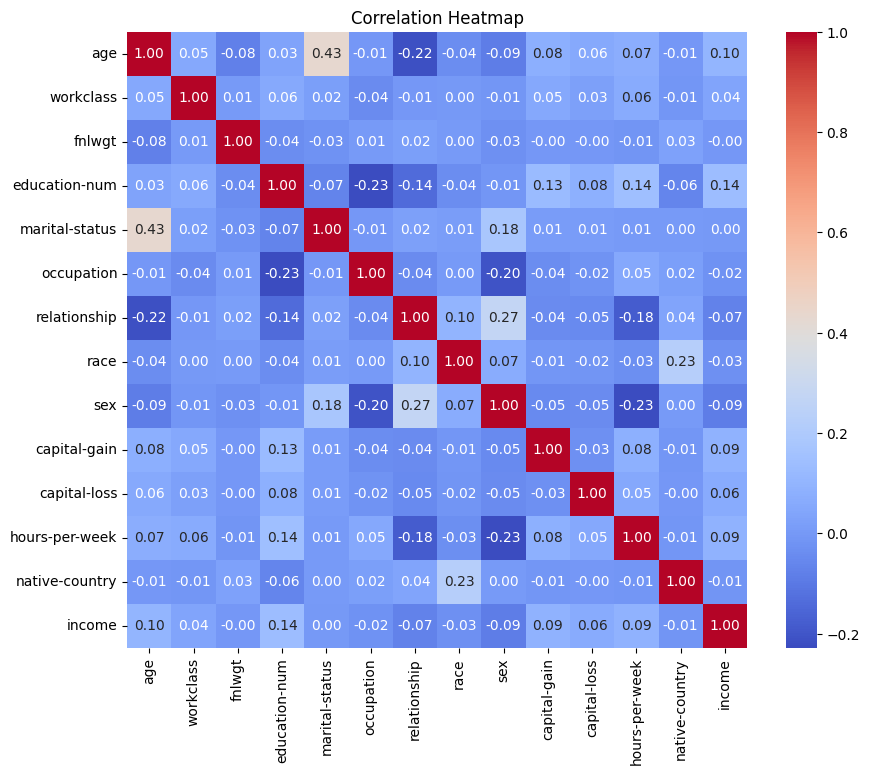

In [351]:
corr_matrix = df_category_num.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

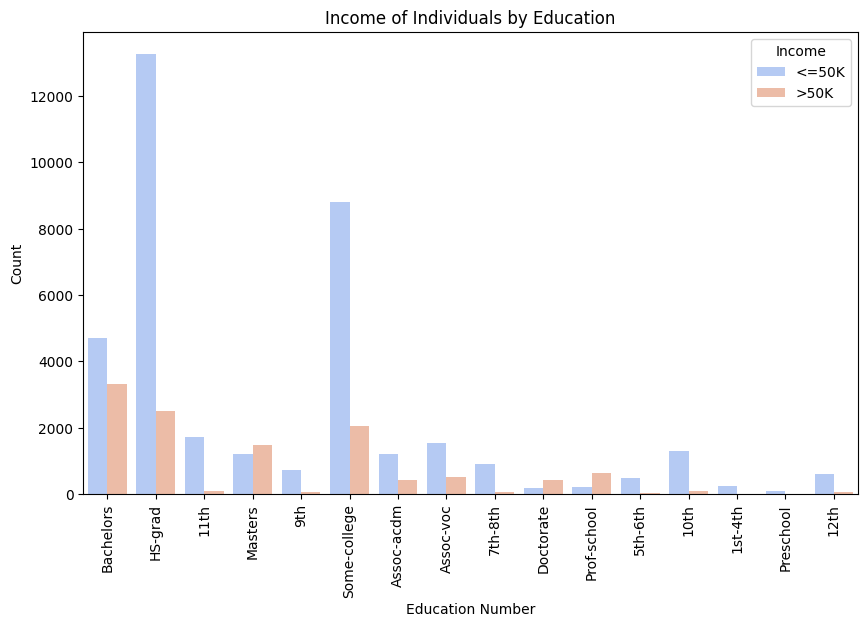

In [365]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=df, palette='coolwarm')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Income of Individuals by Education')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=90)
plt.show()

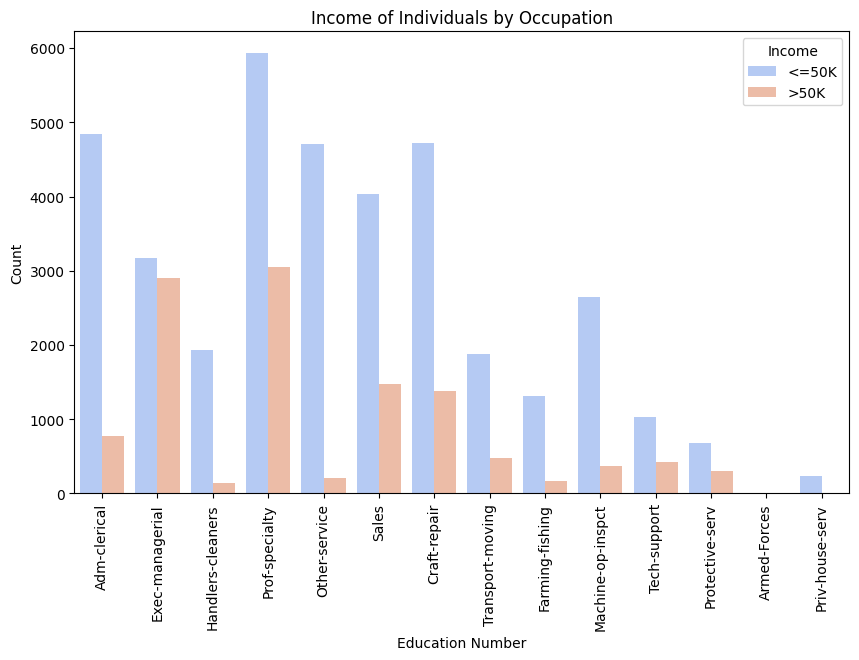

In [364]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=df, palette='coolwarm')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Income of Individuals by Occupation')
plt.legend(title='Income', loc='upper right')
plt.xticks(rotation=90)
plt.show()

<ipython-input-369-a1bfe37908bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df_high_income, palette='coolwarm')


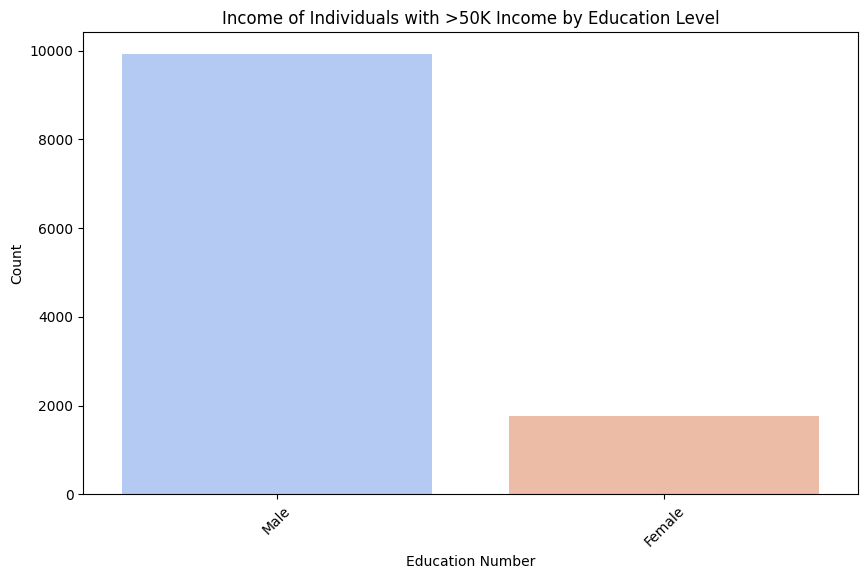

In [369]:
# Filter the DataFrame to include only >50K income
df_high_income = df[df['income'] == '>50K']

# Count plot for income by education level (only >50K)
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df_high_income, palette='coolwarm')
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Income of Individuals with >50K Income by Education Level')
plt.xticks(rotation=45)
plt.show()